In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET

In [8]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt

# Abrir el archivo GPX
with open(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\2020-08-04.22.32.13.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Imprimir alguna información sobre los waypoints
for waypoint in gpx.waypoints:
    print('Nombre: %s' % waypoint.name)
    print('Latitud: %s' % waypoint.latitude)
    print('Longitud: %s' % waypoint.longitude)
    print('Elevación: %s' % waypoint.elevation)
    print('')

In [9]:
gpx

GPX(tracks=[GPXTrack(name='Sport', segments=[GPXTrackSegment(points=[...])])])

In [10]:
gpx.get_track_points_no()

257

In [11]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=474.0, maximum=478.0)

In [12]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=483.0, downhill=7.0)

In [13]:
gpx.to_xml()[:1000]

'<?xml version="1.0" encoding="UTF-8"?>\n<gpx xmlns="http://www.topografix.com/GPX/1/1" xmlns:ns1="http://www.cluetrust.com/XML/GPXDATA/1/0" xmlns:ns2="http://www.garmin.com/xmlschemas/GpxExtensions/v3" xmlns:ns3="http://www.garmin.com/xmlschemas/TrackPointExtension/v1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/11.xsd" version="1.1" creator="Huami Amazfit Sports Watch">\n  <metadata>\n    <name>Amazfit Watch</name>\n    <author>\n      <name>Amazfit Watch</name>\n    </author>\n    <time>2020-08-04T22:32:13Z</time>\n  </metadata>\n  <trk>\n    <name>Sport</name>\n    <trkseg>\n      <trkpt lat="-31.33989906311035" lon="-64.25768280029297">\n        <time>2020-08-05T01:32:36Z</time>\n        <extensions>\n          <heartrate>81</heartrate>\n          <ns3:TrackPointExtension>\n            <ns3:hr>81</ns3:hr>\n          </ns3:TrackPointExtension>\n        </extensions>\n      </trkpt>\n      

In [14]:
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(-31.33989906311035, -64.25768280029297, time=datetime.datetime(2020, 8, 5, 1, 32, 36, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339900970458984, -64.25767517089844, time=datetime.datetime(2020, 8, 5, 1, 32, 37, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339860916137695, -64.25776672363281, time=datetime.datetime(2020, 8, 5, 1, 32, 42, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339811325073242, -64.25785064697266, time=datetime.datetime(2020, 8, 5, 1, 32, 44, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339778900146484, -64.25791931152344, elevation=476.0, time=datetime.datetime(2020, 8, 5, 1, 32, 46, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339752197265625, -64.25798797607422, elevation=476.0, time=datetime.datetime(2020, 8, 5, 1, 32, 48, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339733123779297, -64.25804138183594, elevation=476.0, time=datetime.datetime(2020, 8, 5, 1, 32, 50, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-31.339706420898438, -64.25811004638672, elevation=47

In [15]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [16]:
route_info[:3]

[{'latitude': -31.33989906311035,
  'longitude': -64.25768280029297,
  'elevation': None},
 {'latitude': -31.339900970458984,
  'longitude': -64.25767517089844,
  'elevation': None},
 {'latitude': -31.339860916137695,
  'longitude': -64.25776672363281,
  'elevation': None}]

In [17]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,-31.339899,-64.257683,NaN
1,-31.339901,-64.257675,NaN
2,-31.339861,-64.257767,NaN
3,-31.339811,-64.257851,NaN
4,-31.339779,-64.257919,476.0


In [18]:
route_df.to_csv(r'C:\Users\Alfredo\Desktop\Microstrategy\Datasets\route_df.csv', index=False)

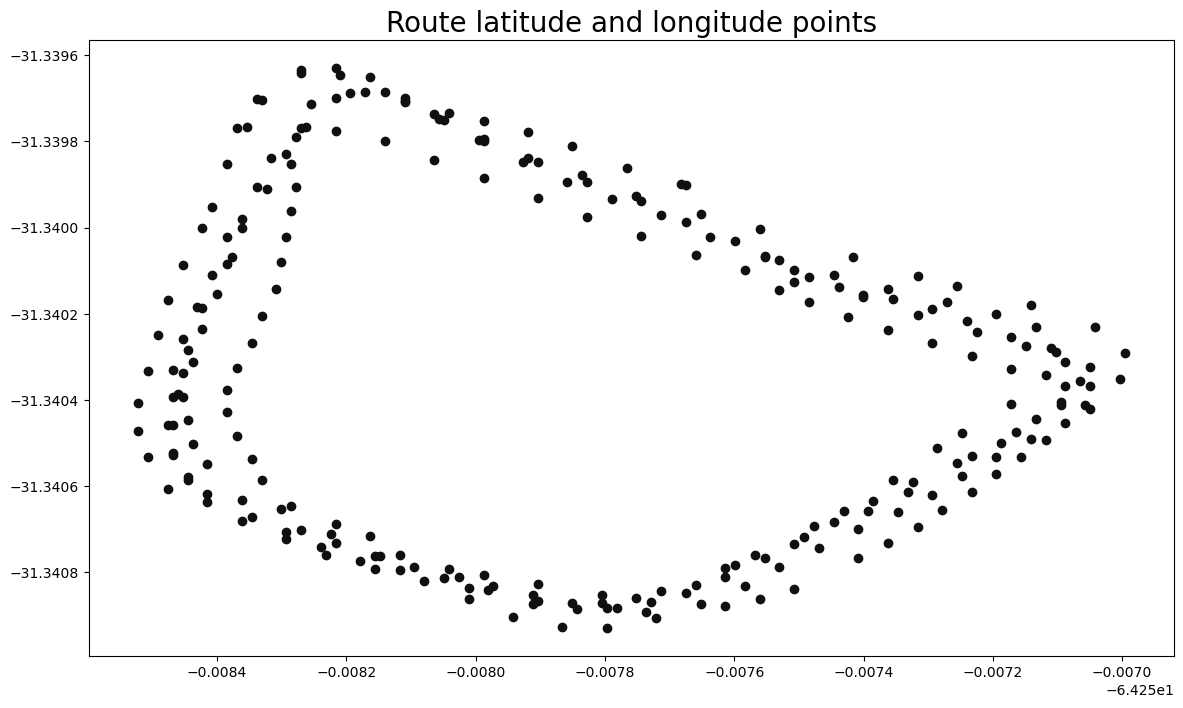

In [19]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

In [23]:
import folium

In [25]:
route_map = folium.Map(
    location=[-31.339861, -64.257851],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
display(route_map)

In [26]:
route_map = folium.Map(
    location=[-31.339861, -64.257851],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
    ).add_to(route_map)

display(route_map)

In [27]:
route_map = folium.Map(
    location=[-31.339861, -64.257851],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [28]:
route_map = folium.Map(
    location=[-31.339861, -64.257851],
    zoom_start=13,
    tiles='CartoDBPositron',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [29]:
route_map = folium.Map(
    location=[-31.339861, -64.257851],
    zoom_start=13,
    tiles='CartoDBDark_Matter',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)